In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [10]:
50_000

50000

In [11]:
# map {num particles -> simulation time}
ptcl_time = {
    1000: 0.0589113,
    2000: 0.0593185,
    5000: 0.0614022,
    10_000: 0.0551463,
    10_000: 0.0628781,
    10_000: 0.0637146,
    50_000: 0.0807788,
    100_000: 0.106653,
    500_000: 0.476949,
    800_000: 0.961326,
    900_000: 1.11522,
    10000000: 19.1831,

}

data = {'num_ptcls': list(ptcl_time.keys()),
        'sim_time': list(ptcl_time.values()),}

df = pd.DataFrame(data)

# get an average sim time for each total num. procs
df_avgd = df.groupby('num_ptcls')[['sim_time', 'num_ptcls']].mean()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


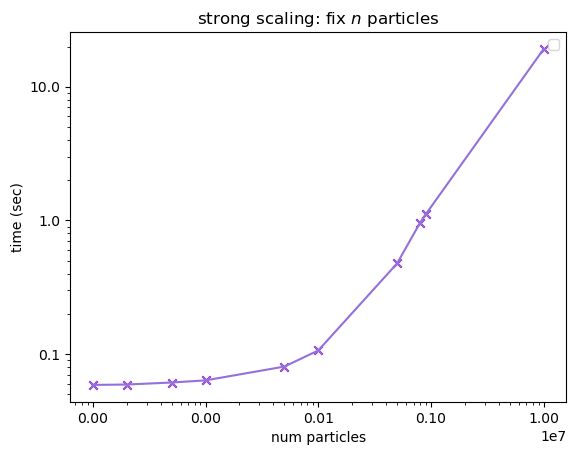

In [14]:
# strong scaling
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('num particles')
ax.set_ylabel('time (sec)')
ax.set_title('strong scaling: fix $n$ particles')
# ax.set_xticks([1e3, 10e4, 10e5, 10e6])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.set_yticks([0.1, 1, 10, 100])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# 1M particles
plt.scatter(x=df['num_ptcls'], y=df['sim_time'], marker='x', c='darkviolet')
plt.plot(df_avgd['num_ptcls'], df_avgd['sim_time'], marker='x', c='mediumpurple')

plt.legend();

weak scaling plots

In [125]:

sim_times = [0.634796, 0.651963, 0.735537, 0.924295, 
             2.15381, 4.89433, 11.6037]
num_particles = (10**4)*np.array([1,2,4,8,16,32,64])
n_procs = 2*np.array([1,2,4,8,16,32,64])

data = {'num_particles': num_particles,
        'n_procs': n_procs,
        'sim_time': sim_times}

df = pd.DataFrame(data)

# get an average sim time for each total num. procs
# df_avgd_5 = df_5.groupby('total_procs')[['sim_time', 'total_procs', 'num_particles']].mean()


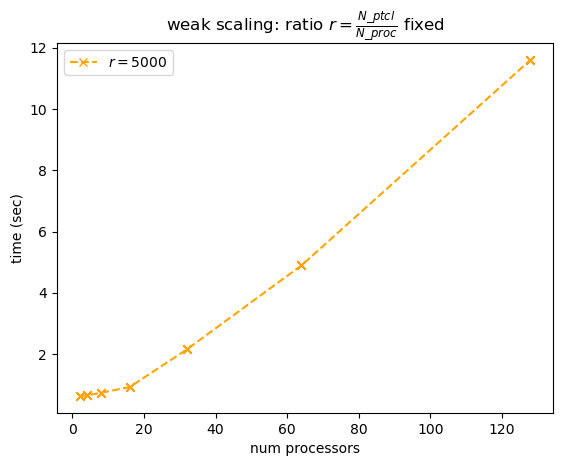

In [126]:
# strong scaling
fig, ax = plt.subplots()
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('num processors')
ax.set_ylabel('time (sec)')
ax.set_title('weak scaling: ratio $r=\\frac{N\_ptcl}{N\_proc}$ fixed')
# ax.set_xticks([1,2,4,8,16,32,64,128])
# ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.set_yticks([0.1, 1, 10, 100])
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# 100k particles
plt.scatter(x=df['n_procs'], y=df['sim_time'], marker='x', c='darkorange')
plt.plot(df['n_procs'], df['sim_time'], ls='--', marker='x', c='orange', label='$r=5000$')

# 1M particles
# plt.scatter(x=df_6['total_procs'], y=df_6['sim_time'], marker='x', c='darkviolet')
# plt.plot(df_avgd_6['total_procs'], df_avgd_6['sim_time'], marker='x', c='mediumpurple', label='$n=10^6$')

plt.legend();

In [ ]:

sim_times = [16.25, 18.41, 18.48,  ]
num_particles = (10**5)*np.array([1,2,2,])
nodes_procs = [(1,1), (1,2), (2,1), ]

# num_nodes = [1]*len(sim_times)
# num_particles = [10**5]*len(sim_times)

# *************
# Add data for 2-node computations:
# *************
sim_times_2 = [0.578, 0.589, 0.569,
               0.598, 0.617, 0.727,
               0.953, 1.024, 0.701,
               0.960, 1.470, 1.160,
               1.857, 1.834, 2.415,
               4.103, 4.151, ]

proc_per_node += [64, 64, 64,
                  32, 32, 32,
                  16, 16, 16,
                  8, 8, 8,
                  4, 4, 4,
                  2, 2, ]

num_nodes += [2]*len(sim_times_2)
num_particles += [10**5]*len(sim_times_2)



# data for 10^5 ptcls:

data_5 = {'num_particles': num_particles,
        'num_nodes': num_nodes,
        'proc_per_node' : proc_per_node,
        'total_procs': [n*p for n,p in zip(num_nodes, proc_per_node)],
        'sim_time': sim_times + sim_times_2,
        'seed': [1]*len(sim_times+sim_times_2),
        }

df_5 = pd.DataFrame(data_5)

# get an average sim time for each total num. procs
df_avgd_5 = df_5.groupby('total_procs')[['sim_time', 'total_procs', 'num_particles']].mean()
